In [1]:
from PIL import Image
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from google.colab import files

def Phan_doan_lan_can(img, ksize):
    m, n = img.shape
    img_ket_qua_phan_doan = np.zeros([m, n])
    h=(ksize -1) // 2
    a=20
    b=1
    padded_img = np.pad(img, (h, h), mode='reflect')
    mG = np.mean(padded_img)   # Bước 1. Tính trung bình mức xám ảnh
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            Do_lech_chuan = np.std(vung_anh_kich_thuoc_k) # Bước 1. Tính độ lệch chuẩn cục bộ
            T= a*Do_lech_chuan + b*mG   # Bước 2. Tính ngưỡng theo công thức 11
            if padded_img[i, j] > T:    # Bước 3. Cắt ngưỡng theo công thức 12
                img_ket_qua_phan_doan[i, j] = 255
            else:
                img_ket_qua_phan_doan[i, j] = 0
    return img_ket_qua_phan_doan

def showimg(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10, 10))

    plt.subplot(3, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Ảnh gốc")
    plt.axis('off')
    plt.show()

    # Chuyển đổi thành ảnh màu đen
    image = cv2.bitwise_and(image, image, mask=black_pixels_mask)

    image = cv2.bitwise_not(image)
    resized_image = cv2.resize(image, (28, 28))
    preprocessed_image = resized_image.reshape((1, 28, 28, 1)) / 255.0
    plt.figure(figsize=(10, 10))

    plt.subplot(3, 3, 3)
    plt.imshow(resized_image, cmap='gray')
    plt.title("Ảnh qua xử lý")
    plt.axis('off')
    plt.show()


# Function to preprocess input image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Áp dụng ngưỡng để chuyển các pixel tối màu thành màu đen
    _, black_pixels_mask = cv2.threshold(image, 30, 255, cv2.THRESH_BINARY)

    # Chuyển đổi thành ảnh màu đen
    image = cv2.bitwise_and(image, image, mask=black_pixels_mask)

    image = cv2.bitwise_not(image)
    resized_image = cv2.resize(image, (28, 28))
    preprocessed_image = resized_image.reshape((1, 28, 28, 1)) / 255.0
    return preprocessed_image

# Function to predict digit from input image
def predict_digit(image_path):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_digit = np.argmax(prediction)
    predicted_probability = np.max(prediction)
    return predicted_digit, predicted_probability

Saving csvt07.jpg to csvt07 (2).jpg


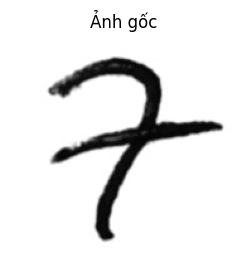

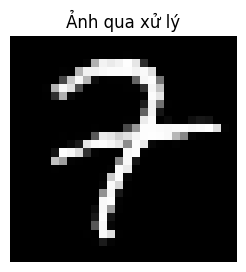

1/1 [==============================] - 0s 90ms/step
Dự đoán: 7 , Tỉ lệ:  0.8544686


In [34]:
# Get the path of the uploaded image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load pre-trained model
model = load_model('mnist_model_002.h5')

# Predict digit from the uploaded image
showimg(image_path)
predicted_digit, predicted_probability = predict_digit(image_path)
print("Dự đoán:", predicted_digit, ", Tỉ lệ: ", predicted_probability)

Saving csvt06.jpg to csvt06 (2).jpg


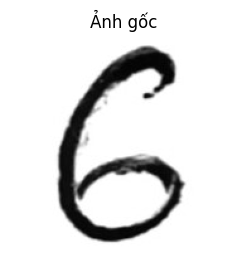

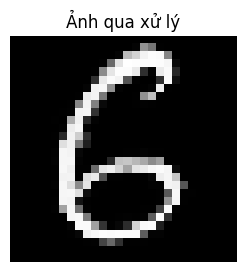

1/1 [==============================] - 0s 133ms/step
Dự đoán: 6 , Tỉ lệ:  1.0


In [40]:
# Get the path of the uploaded image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load pre-trained model
model = load_model('mnist_model_003.h5')

# Predict digit from the uploaded image
showimg(image_path)
predicted_digit, predicted_probability = predict_digit(image_path)
print("Dự đoán:", predicted_digit, ", Tỉ lệ: ", predicted_probability)

Saving csvt06.jpg to csvt06 (1).jpg


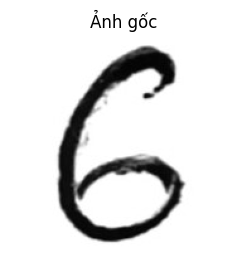

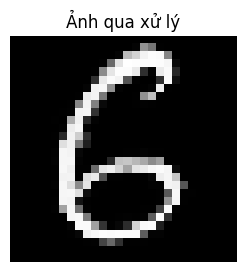

1/1 [==============================] - 0s 103ms/step
Dự đoán: 6 , Tỉ lệ:  0.9999999


In [39]:
# Get the path of the uploaded image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load pre-trained model
model = load_model('mnist_model_004.h5')

# Predict digit from the uploaded image
showimg(image_path)
predicted_digit, predicted_probability = predict_digit(image_path)
print("Dự đoán:", predicted_digit, ", Tỉ lệ: ", predicted_probability)